In [1]:
import sys
import os, glob
import csv 
import calendar
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
from pyfunctions import *

/Users/linniahawkins/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Load data
sw_thresh = 0 # W/m2 Shortwave threshold
df_ca3 = load_daily_data('CA-Ca3',sw_thresh)
df_me6 = load_daily_data('US-Me6',sw_thresh)
df_wref = load_daily_data('WREF',sw_thresh)
df_abby = load_daily_data('ABBY',sw_thresh)

In [3]:
# drop cloudy days
df_ca3 = df_ca3[df_ca3.SW_IN>200]
df_me6 = df_me6[df_me6.SW_IN>200]
df_wref = df_wref[df_wref.SW_IN>200]
df_abby = df_abby[df_abby.SW_IN>200]

In [4]:
# Load Phenocam data (daily 2017-2023)
in_dir = '../data/'
filename = os.path.join(in_dir+'Heat_Dome_PhenoCam_Data_2017-2023.csv')
df_gcc = pd.read_csv(filename,index_col=0,parse_dates=True, squeeze=True,header=0,skiprows = [i for i in range(1,2) ])

In [5]:
#normalize
gcc_2021 = df_gcc[datetime(2021,3,1):datetime(2021,10,31)]
gcc_2021_scaled = gcc_2021.apply(lambda col: (col - col.min()) / (col.max() - col.min()), axis=0)

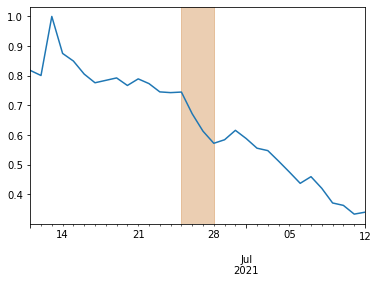

In [6]:
# check
gcc_2021_scaled['ABBY NEON'][datetime(2021,6,11):datetime(2021,7,12)].plot()
plt.axvspan(datetime(2021,6,25),datetime(2021,6,28),-10,10,color='peru',alpha = 0.4)

In [7]:
# 4 days
preH = pd.date_range(datetime(2021,6,21),datetime(2021,6,24),freq='D')
H = pd.date_range(datetime(2021,6,25),datetime(2021,6,28),freq='D')
postH = pd.date_range(datetime(2021,6,29),datetime(2021,7,2),freq='D')

In [8]:
# 7 days
preH = pd.date_range(datetime(2021,6,18),datetime(2021,6,24),freq='D')
H = pd.date_range(datetime(2021,6,25),datetime(2021,6,28),freq='D')
postH = pd.date_range(datetime(2021,6,29),datetime(2021,7,5),freq='D')

In [7]:
# 14 days
preH = pd.date_range(datetime(2021,6,11),datetime(2021,6,24),freq='30min')
H = pd.date_range(datetime(2021,6,25),datetime(2021,6,28),freq='30min')
postH = pd.date_range(datetime(2021,6,29),datetime(2021,7,12),freq='30min')

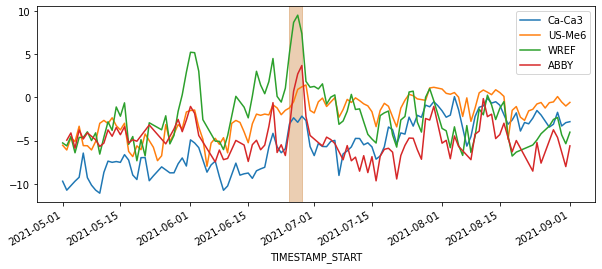

In [8]:
plt.figure(figsize=(10,4))
st = datetime(2021,5,1); en = datetime(2021,9,1)
df_ca3['NEE'][st:en].plot(label='Ca-Ca3')
df_me6['NEE'][st:en].plot(label='US-Me6')
df_wref['NEE'][st:en].plot(label='WREF')
df_abby['NEE'][st:en].plot(label='ABBY')
plt.axvspan(datetime(2021,6,25),datetime(2021,6,28),-10,10,color='peru',alpha = 0.4)
plt.legend()

### Resistance

In [9]:
def get_resistance(data,H_dates,preH_dates,var):
    preH_data = data[var][preH_dates[0]:preH_dates[-1]]
    H_data = data[var][H_dates[0]:H_dates[-1]]
    
    rt = np.mean(H_data)/np.mean(preH_data)
    
    se_preH = np.std(preH_data,ddof=1) / np.sqrt(len(preH_data))
    se_H = np.std(H_data,ddof=1) / np.sqrt(len(H_data))
    se = rt * np.sqrt((se_H/np.mean(H_data))**2 + (se_preH/np.mean(preH_data))**2)
    
    return rt, se
    

In [10]:
var = 'LH'
Rt_ca3, se_ca3 = get_resistance(df_ca3,H,preH,var)
Rt_me6, se_me6 = get_resistance(df_me6,H,preH,var)
Rt_wref, se_wref = get_resistance(df_wref,H,preH,var)
Rt_abby, se_abby = get_resistance(df_abby,H,preH,var)

Rt_LE = [Rt_ca3, Rt_wref, Rt_abby, Rt_me6]
Rt_LE_se = [se_ca3, se_wref, se_abby, se_me6]

In [11]:
var = 'NEE'
Rt_ca3, se_ca3 = get_resistance(df_ca3,H,preH,var)
Rt_me6, se_me6 = get_resistance(df_me6,H,preH,var)
Rt_wref, se_wref = get_resistance(df_wref,H,preH,var)
Rt_abby, se_abby = get_resistance(df_abby,H,preH,var)

Rt_NEE = [Rt_ca3, Rt_wref, Rt_abby, Rt_me6]
Rt_NEE_se = [se_ca3, se_wref, se_abby, se_me6]

In [12]:
var = 'GPP'
Rt_ca3, se_ca3 = get_resistance(df_ca3,H,preH,var)
Rt_me6, se_me6 = get_resistance(df_me6,H,preH,var)
Rt_wref, se_wref = get_resistance(df_wref,H,preH,var)
Rt_abby, se_abby = get_resistance(df_abby,H,preH,var)

Rt_GPP = [Rt_ca3, Rt_wref, Rt_abby, Rt_me6]
Rt_GPP_se = [se_ca3, se_wref, se_abby, se_me6]

In [13]:
var = 'RECO'
Rt_ca3, se_ca3 = get_resistance(df_ca3,H,preH,var)
Rt_me6, se_me6 = get_resistance(df_me6,H,preH,var)
Rt_wref, se_wref = get_resistance(df_wref,H,preH,var)
Rt_abby,se_abby = get_resistance(df_abby,H,preH,var)

Rt_RECO = [Rt_ca3, Rt_wref, Rt_abby, Rt_me6]
Rt_RECO_se = [se_ca3, se_wref, se_abby, se_me6]

In [14]:
# GCC
var = 'vancouverisland (CA-Ca3)'
Rt_ca3, se_ca3 = get_resistance(gcc_2021_scaled,H,preH,var)
var = 'WREF NEON'
Rt_wref, se_wref = get_resistance(gcc_2021_scaled,H,preH,var)
var = 'ABBY NEON'
Rt_abby, se_abby = get_resistance(gcc_2021_scaled,H,preH,var)
var = 'oregonYP (US-Me6)'
Rt_me6, se_me6 = get_resistance(gcc_2021_scaled,H,preH,var)

Rt_GCC = [Rt_ca3, Rt_wref, Rt_abby, Rt_me6]
Rt_GCC_se = [se_ca3, se_wref, se_abby, se_me6]

### Recovery

In [15]:
def get_recovery(data,H_dates,postH_dates,var):
    postH_data = data[var][postH_dates[0]:postH_dates[-1]]
    H_data = data[var][H_dates[0]:H_dates[-1]]
    
    rc = np.mean(postH_data)/np.mean(H_data)
    
    se_postH = np.std(postH_data,ddof=1) / np.sqrt(len(postH_data))
    se_H = np.std(H_data,ddof=1) / np.sqrt(len(H_data))
    se = rc * np.sqrt((se_H/np.mean(H_data))**2 + (se_postH/np.mean(postH_data))**2)
    
    return rc, se

In [16]:
var = 'LH'
Rc_ca3, se_ca3 = get_recovery(df_ca3,H,postH,var)
Rc_me6, se_me6 = get_recovery(df_me6,H,postH,var)
Rc_wref, se_wref = get_recovery(df_wref,H,postH,var)
Rc_abby, se_abby = get_recovery(df_abby,H,postH,var)

Rc_LE = [Rc_ca3, Rc_wref, Rc_abby, Rc_me6]
Rc_LE_se = [se_ca3, se_wref, se_abby, se_me6]

In [17]:
var = 'NEE'
Rc_ca3, se_ca3 = get_recovery(df_ca3,H,postH,var)
Rc_me6, se_me6 = get_recovery(df_me6,H,postH,var)
Rc_wref, se_wref = get_recovery(df_wref,H,postH,var)
Rc_abby, se_abby = get_recovery(df_abby,H,postH,var)

Rc_NEE = [Rc_ca3, Rc_wref, Rc_abby, Rc_me6]
Rc_NEE_se = [se_ca3, se_wref, se_abby, se_me6]

In [18]:
var = 'GPP'
Rc_ca3, se_ca3 = get_recovery(df_ca3,H,postH,var)
Rc_me6, se_me6 = get_recovery(df_me6,H,postH,var)
Rc_wref, se_wref = get_recovery(df_wref,H,postH,var)
Rc_abby, se_abby = get_recovery(df_abby,H,postH,var)

Rc_GPP = [Rc_ca3, Rc_wref, Rc_abby, Rc_me6]
Rc_GPP_se = [se_ca3, se_wref, se_abby, se_me6]

In [19]:
var = 'RECO'
Rc_ca3, se_ca3 = get_recovery(df_ca3,H,postH,var)
Rc_me6, se_me6 = get_recovery(df_me6,H,postH,var)
Rc_wref, se_wref = get_recovery(df_wref,H,postH,var)
Rc_abby, se_abby = get_recovery(df_abby,H,postH,var)

Rc_RECO = [Rc_ca3, Rc_wref, Rc_abby, Rc_me6]
Rc_RECO_se = [se_ca3, se_wref, se_abby, se_me6]

In [20]:
# GCC
var = 'vancouverisland (CA-Ca3)'
Rc_ca3, se_ca3 = get_recovery(gcc_2021_scaled,H,postH,var)
var = 'WREF NEON'
Rc_wref, se_wref = get_recovery(gcc_2021_scaled,H,postH,var)
var = 'ABBY NEON'
Rc_abby, se_abby = get_recovery(gcc_2021_scaled,H,postH,var)
var = 'oregonYP (US-Me6)'
Rc_me6, se_me6 = get_recovery(gcc_2021_scaled,H,postH,var)

Rc_GCC = [Rc_ca3, Rc_wref, Rc_abby, Rc_me6]
Rc_GCC_se = [se_ca3, se_wref, se_abby, se_me6]

### Resilience

In [21]:
def get_resilience(data,preH_dates,postH_dates,var):
    preH_data = data[var][preH_dates[0]:preH_dates[-1]]
    postH_data = data[var][postH_dates[0]:postH_dates[-1]]
    
    rs = np.mean(postH_data)/np.mean(preH_data)
    
    se_postH = np.std(postH_data,ddof=1) / np.sqrt(len(postH_data))
    se_preH = np.std(preH_data,ddof=1) / np.sqrt(len(preH_data))
    se = rs * np.sqrt((se_preH/np.mean(preH_data))**2 + (se_postH/np.mean(postH_data))**2)
    
    return rs, se

In [22]:
var = 'LH'
Rs_ca3, se_ca3 = get_resilience(df_ca3,preH,postH,var)
Rs_me6, se_me6 = get_resilience(df_me6,preH,postH,var)
Rs_wref, se_wref = get_resilience(df_wref,preH,postH,var)
Rs_abby, se_abby = get_resilience(df_abby,preH,postH,var)

Rs_LE = [Rs_ca3, Rs_wref, Rs_abby, Rs_me6]
Rs_LE_se = [se_ca3, se_wref, se_abby, se_me6]

In [23]:
var = 'NEE'
Rs_ca3, se_ca3 = get_resilience(df_ca3,preH,postH,var)
Rs_me6, se_me6 = get_resilience(df_me6,preH,postH,var)
Rs_wref, se_wref = get_resilience(df_wref,preH,postH,var)
Rs_abby, se_abby = get_resilience(df_abby,preH,postH,var)

Rs_NEE = [Rs_ca3, Rs_wref, Rs_abby, Rs_me6]
Rs_NEE_se = [se_ca3, se_wref, se_abby, se_me6]

In [24]:
var = 'GPP'
Rs_ca3, se_ca3 = get_resilience(df_ca3,preH,postH,var)
Rs_me6, se_me6 = get_resilience(df_me6,preH,postH,var)
Rs_wref, se_wref = get_resilience(df_wref,preH,postH,var)
Rs_abby, se_abby = get_resilience(df_abby,preH,postH,var)

Rs_GPP = [Rs_ca3, Rs_wref, Rs_abby, Rs_me6]
Rs_GPP_se = [se_ca3, se_wref, se_abby, se_me6]

In [25]:
var = 'RECO'
Rs_ca3, se_ca3 = get_resilience(df_ca3,preH,postH,var)
Rs_me6, se_me6 = get_resilience(df_me6,preH,postH,var)
Rs_wref, se_wref = get_resilience(df_wref,preH,postH,var)
Rs_abby, se_abby = get_resilience(df_abby,preH,postH,var)

Rs_RECO = [Rs_ca3, Rs_wref, Rs_abby, Rs_me6]
Rs_RECO_se = [se_ca3, se_wref, se_abby, se_me6]

In [26]:
# GCC
var = 'vancouverisland (CA-Ca3)'
Rs_ca3, se_ca3 = get_resilience(gcc_2021_scaled,preH,postH,var)
var = 'WREF NEON'
Rs_wref, se_wref = get_resilience(gcc_2021_scaled,preH,postH,var)
var = 'ABBY NEON'
Rs_abby, se_abby = get_resilience(gcc_2021_scaled,preH,postH,var)
var = 'oregonYP (US-Me6)'
Rs_me6, se_me6 = get_resilience(gcc_2021_scaled,preH,postH,var)

Rs_GCC = [Rs_ca3, Rs_wref, Rs_abby, Rs_me6]
Rs_GCC_se = [se_ca3, se_wref, se_abby, se_me6]

### Write txtfiles

In [27]:
header = ['Ca-Ca3','WREF','ABBY','US-Me6']
index = ['resistance','resistance se','recovery','recovery se','resilience','resilience se']
data = [Rt_NEE,Rt_NEE_se,Rc_NEE,Rc_NEE_se,Rs_NEE,Rs_NEE_se]
out = pd.DataFrame(data,index = index,columns=header)
out.to_csv('../figs/HW_metrics_NEE_14days_noclouds.csv')

In [28]:
header = ['Ca-Ca3','WREF','ABBY','US-Me6']
index = ['resistance','resistance se','recovery','recovery se','resilience','resilience se']
data = [Rt_LE,Rt_LE_se,Rc_LE,Rc_LE_se,Rs_LE,Rs_LE_se]
out = pd.DataFrame(data,index = index,columns=header)
out.to_csv('../figs/HW_metrics_LE_14days_noclouds.csv')

In [29]:
header = ['Ca-Ca3','WREF','ABBY','US-Me6']
index = ['resistance','resistance se','recovery','recovery se','resilience','resilience se']
data = [Rt_GPP,Rt_GPP_se,Rc_GPP,Rc_GPP_se,Rs_GPP,Rs_GPP_se]
out = pd.DataFrame(data,index = index,columns=header)
out.to_csv('../figs/HW_metrics_GPP_14days_noclouds.csv')

In [30]:
header = ['Ca-Ca3','WREF','ABBY','US-Me6']
index = ['resistance','resistance se','recovery','recovery se','resilience','resilience se']
data = [Rt_RECO,Rt_RECO_se,Rc_RECO,Rc_RECO_se,Rs_RECO,Rs_RECO_se]
out = pd.DataFrame(data,index = index,columns=header)
out.to_csv('../figs/HW_metrics_RECO_14days_noclouds.csv')

In [31]:
header = ['Ca-Ca3','WREF','ABBY','US-Me6']
index = ['resistance','resistance se','recovery','recovery se','resilience','resilience se']
data = [Rt_GCC,Rt_GCC_se,Rc_GCC,Rc_GCC_se,Rs_GCC,Rs_GCC_se]
out = pd.DataFrame(data,index = index,columns=header)
out.to_csv('../figs/HW_metrics_GCC_14days_noclouds_scaled.csv')

### Plot barcharts

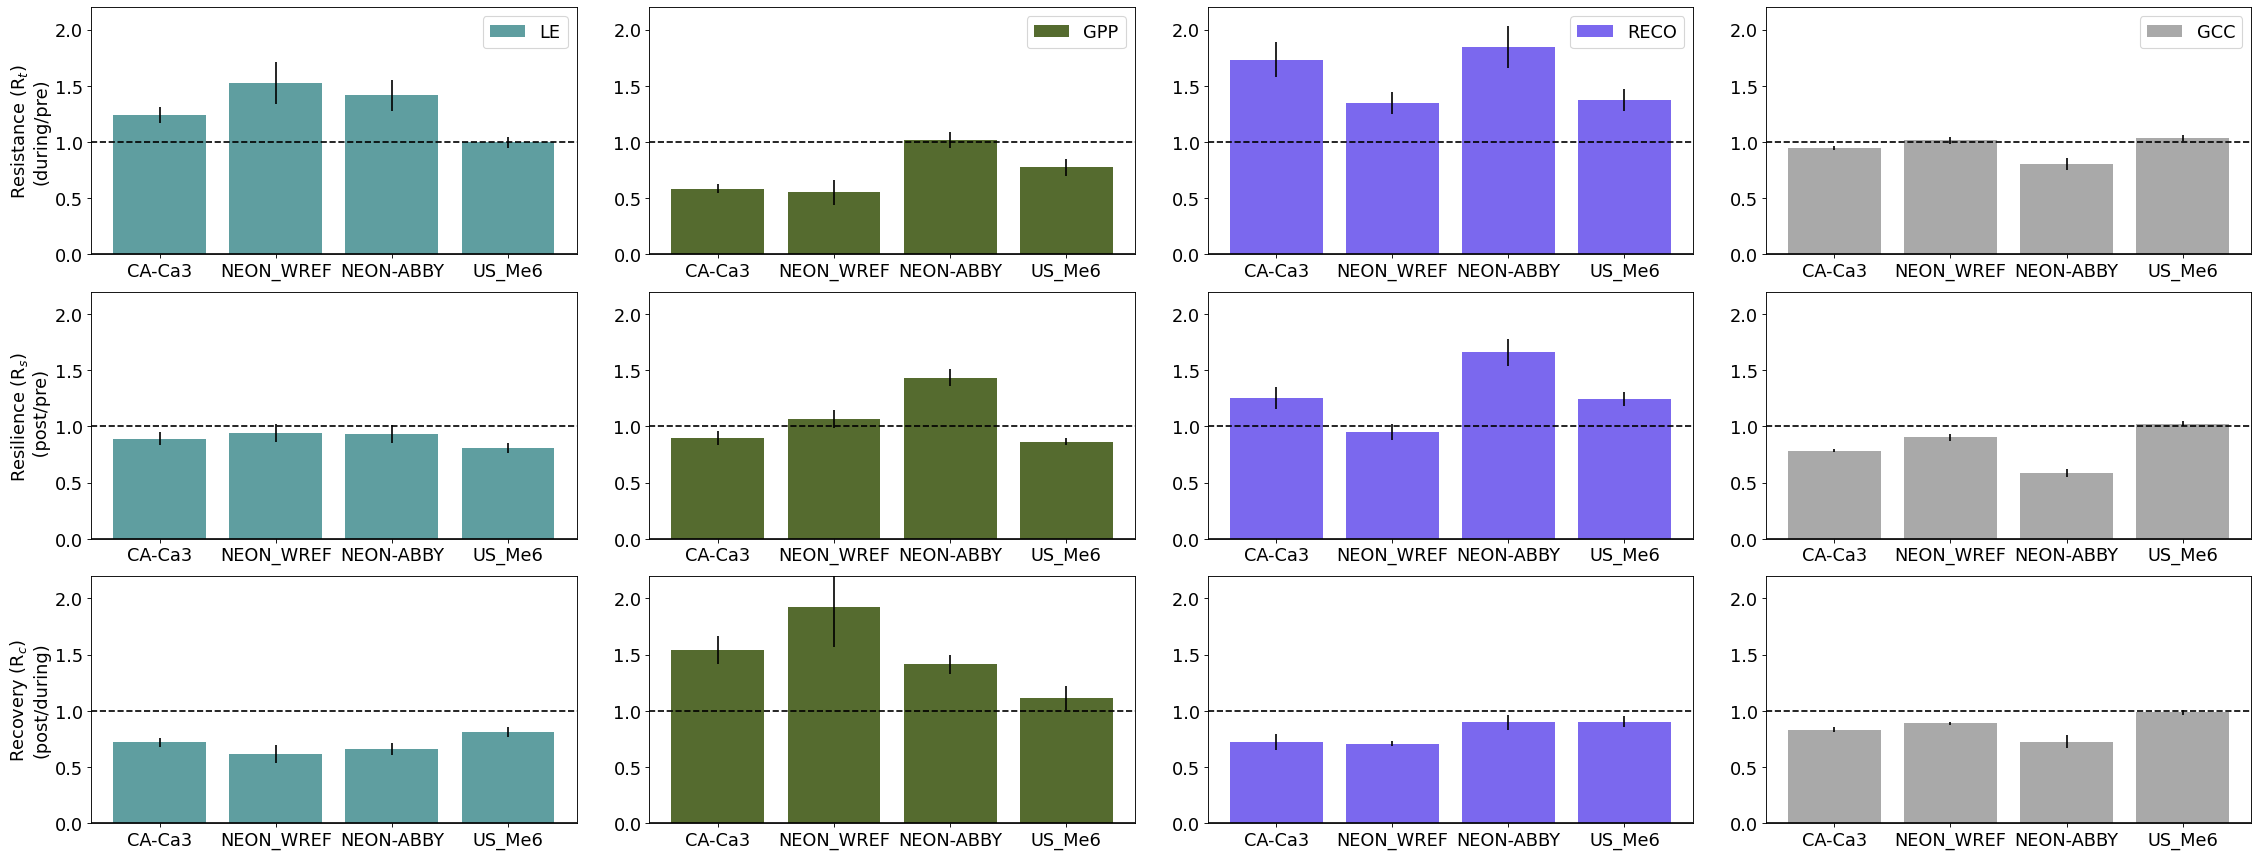

In [42]:
plt.figure(num=None, figsize=(36, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=.15, bottom=.1, right=.9, top=.95, wspace=0.15, hspace=0.15)
plt.rcParams.update({'font.size': 16})

plt.subplot(3,4,1)
plt.bar([1,2,3,4], Rt_LE, yerr=Rt_LE_se, color='cadetblue',label='LE')
plt.axhline(1,linestyle='--',c='k')
plt.axhline(0,linestyle='-',c='k')
plt.ylim([0,2.2])
plt.ylabel('Resistance (R$_t$)\n(during/pre)')
plt.legend(loc='upper right')
plt.xticks([1,2,3,4], ['CA-Ca3','NEON_WREF','NEON-ABBY','US_Me6'])

plt.subplot(3,4,2)
plt.bar([1,2,3,4], Rt_GPP, yerr=Rt_GPP_se, color='darkolivegreen',label='GPP')
plt.axhline(1,linestyle='--',c='k')
plt.axhline(0,linestyle='-',c='k')
plt.ylim([0,2.2])
plt.legend(loc='upper right')
plt.xticks([1,2,3,4], ['CA-Ca3','NEON_WREF','NEON-ABBY','US_Me6'])

plt.subplot(3,4,3)
plt.bar([1,2,3,4], Rt_RECO, yerr=Rt_RECO_se, color='mediumslateblue',label='RECO')
plt.axhline(1,linestyle='--',c='k')
plt.axhline(0,linestyle='-',c='k')
plt.ylim([0,2.2])
plt.legend(loc='upper right')
plt.xticks([1,2,3,4], ['CA-Ca3','NEON_WREF','NEON-ABBY','US_Me6'])

plt.subplot(3,4,4)
plt.bar([1,2,3,4], Rt_GCC, yerr = Rt_GCC_se, color='darkgrey',label='GCC')
plt.axhline(1,linestyle='--',c='k')
plt.axhline(0,linestyle='-',c='k')
plt.ylim([0,2.2])
plt.legend(loc='upper right')
plt.xticks([1,2,3,4], ['CA-Ca3','NEON_WREF','NEON-ABBY','US_Me6'])



plt.subplot(3,4,9)
plt.bar([1,2,3,4], Rc_LE, yerr=Rc_LE_se, color='cadetblue',label='LE')
plt.axhline(1,linestyle='--',c='k')
plt.axhline(0,linestyle='-',c='k')
plt.ylim([0,2.2])
plt.ylabel('Recovery (R$_c$)\n(post/during)')
#plt.legend()
plt.xticks([1,2,3,4], ['CA-Ca3','NEON_WREF','NEON-ABBY','US_Me6'])

plt.subplot(3,4,10)
plt.bar([1,2,3,4], Rc_GPP, yerr=Rc_GPP_se, color='darkolivegreen',label='GPP')
plt.axhline(1,linestyle='--',c='k')
plt.axhline(0,linestyle='-',c='k')
plt.ylim([0,2.2])
#plt.legend()
plt.xticks([1,2,3,4], ['CA-Ca3','NEON_WREF','NEON-ABBY','US_Me6'])

plt.subplot(3,4,11)
plt.bar([1,2,3,4], Rc_RECO, yerr=Rc_RECO_se, color='mediumslateblue',label='RECO')
plt.axhline(1,linestyle='--',c='k')
plt.axhline(0,linestyle='-',c='k')
plt.ylim([0,2.2])
plt.xticks([1,2,3,4], ['CA-Ca3','NEON_WREF','NEON-ABBY','US_Me6'])

plt.subplot(3,4,12)
plt.bar([1,2,3,4], Rc_GCC, yerr=Rc_GCC_se, color='darkgrey',label='GCC')
plt.axhline(1,linestyle='--',c='k')
plt.axhline(0,linestyle='-',c='k')
plt.ylim([0,2.2])
plt.xticks([1,2,3,4], ['CA-Ca3','NEON_WREF','NEON-ABBY','US_Me6'])



plt.subplot(3,4,5)
plt.bar([1,2,3,4], Rs_LE, yerr=Rs_LE_se, color='cadetblue',label='LE')
plt.axhline(1,linestyle='--',c='k')
plt.axhline(0,linestyle='-',c='k')
plt.ylim([0,2.2])
plt.ylabel('Resilience (R$_s$) \n (post/pre)')
plt.xticks([1,2,3,4], ['CA-Ca3','NEON_WREF','NEON-ABBY','US_Me6'])

plt.subplot(3,4,6)
plt.bar([1,2,3,4], Rs_GPP, yerr=Rs_GPP_se, color='darkolivegreen',label='GPP')
plt.axhline(1,linestyle='--',c='k')
plt.axhline(0,linestyle='-',c='k')
plt.ylim([0,2.2])
plt.xticks([1,2,3,4], ['CA-Ca3','NEON_WREF','NEON-ABBY','US_Me6'])

plt.subplot(3,4,7)
plt.bar([1,2,3,4], Rs_RECO, yerr=Rs_RECO_se, color='mediumslateblue',label='RECO')
plt.axhline(1,linestyle='--',c='k')
plt.axhline(0,linestyle='-',c='k')
plt.ylim([0,2.2])
plt.xticks([1,2,3,4], ['CA-Ca3','NEON_WREF','NEON-ABBY','US_Me6'])

plt.subplot(3,4,8)
plt.bar([1,2,3,4], Rs_GCC, yerr=Rs_GCC_se, color='darkgrey',label='GCC')
plt.axhline(1,linestyle='--',c='k')
plt.axhline(0,linestyle='-',c='k')
plt.ylim([0,2.2])
plt.xticks([1,2,3,4], ['CA-Ca3','NEON_WREF','NEON-ABBY','US_Me6'])


plt.savefig('../figs/Heatwave_metrics_barchart_LE+GPP+RECO+GCC_24hour_nocloudydays_14days_se.png',dpi=300)